<a href="https://www.kaggle.com/code/rizkynindra/orange-quality-classification?scriptVersionId=204963485" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pathlib import Path

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#create pathlib for path
tr_path = Path('/kaggle/input/fresh-and-rotten-orange/train')
ts_path = Path('/kaggle/input/fresh-and-rotten-orange/test')

In [3]:
#Getting Image Paths
tr_img_paths = list(tr_path.glob("*/*"))
tr_img_paths = list(map(lambda x : str(x), tr_img_paths))

tr_img_paths[:10]

['/kaggle/input/fresh-and-rotten-orange/train/freshoranges/translation_Screen Shot 2018-06-13 at 12.20.25 AM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/rotated_by_15_Screen Shot 2018-06-13 at 12.04.46 AM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/rotated_by_60_Screen Shot 2018-06-13 at 12.06.01 AM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/rotated_by_15_Screen Shot 2018-06-13 at 12.10.27 AM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/vertical_flip_Screen Shot 2018-06-12 at 11.58.18 PM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/vertical_flip_Screen Shot 2018-06-13 at 12.14.03 AM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/translation_Screen Shot 2018-06-13 at 12.16.45 AM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/saltandpepper_Screen Shot 2018-06-12 at 11.51.08 PM.png',
 '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/saltandpe

In [4]:
# Getting their respective labels

def get_label(image_path):
    return image_path.split("/")[-2]

tr_img_labels = list(map(lambda x : get_label(x), tr_img_paths))
tr_img_labels[:10]

['freshoranges',
 'freshoranges',
 'freshoranges',
 'freshoranges',
 'freshoranges',
 'freshoranges',
 'freshoranges',
 'freshoranges',
 'freshoranges',
 'freshoranges']

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tr_img_labels = le.fit_transform(tr_img_labels)

tr_img_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
import tensorflow as tf

tr_img_labels = tf.keras.utils.to_categorical(tr_img_labels)

tr_img_labels[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [7]:
from sklearn.model_selection import train_test_split

Tr_paths, Val_paths, Tr_labels, Val_label = train_test_split(tr_img_paths, tr_img_labels)

In [8]:
Tr_paths[:10], Tr_labels[:10]

(['/kaggle/input/fresh-and-rotten-orange/train/rottenoranges/translation_Screen Shot 2018-06-12 at 11.35.55 PM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/rottenoranges/vertical_flip_Screen Shot 2018-06-12 at 11.23.19 PM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/Screen Shot 2018-06-12 at 11.52.46 PM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/vertical_flip_Screen Shot 2018-06-13 at 12.18.52 AM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/translation_Screen Shot 2018-06-13 at 12.08.29 AM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/rottenoranges/rotated_by_45_Screen Shot 2018-06-12 at 11.25.38 PM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/rotated_by_60_Screen Shot 2018-06-13 at 12.13.19 AM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/rotated_by_45_Screen Shot 2018-06-13 at 12.08.54 AM.png',
  '/kaggle/input/fresh-and-rotten-orange/train/freshoranges/rotated_by_

In [9]:
# function used for transformation

def load(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    return image, label

In [10]:
from tensorflow.keras import layers

# Define image size and Batch size
img_size = 224
batch_size = 32

# basic transformation
resize = tf.keras.Sequential([
    layers.Resizing(img_size, img_size)
])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(height_factor = (-0.3, -0.2))
])

In [11]:
# function used to create a tensorflow data object
autotune = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)
    
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    
    dataset = dataset.map(lambda image, label: load(image, label))
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=autotune)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=autotune)
        
    dataset = dataset.repeat()
    return dataset

In [12]:
# creating train dataset object and verifying it
%time train_dataset = get_dataset(Tr_paths, Tr_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 283 ms, sys: 9.4 ms, total: 293 ms
Wall time: 294 ms
(32, 224, 224, 3)
(32, 2)


freshoranges


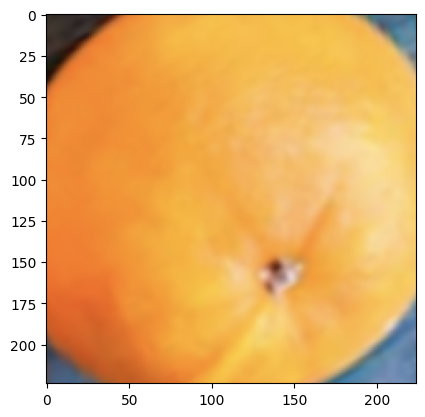

In [13]:
# view a sample training image
print(le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [14]:
%time val_dataset = get_dataset(Val_paths, Val_label, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 28.1 ms, sys: 994 µs, total: 29.1 ms
Wall time: 28.1 ms
(32, 224, 224, 3)
(32, 2)


In [15]:
# building EfficientNetB3 model
from tensorflow.keras.applications import EfficientNetB7

backbone = EfficientNetB7(
    input_shape=(224,224,3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ ?                      │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 63,786,960 (243.33 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [16]:
# compiling your model by providing the optimizer, loss and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='Precision'), tf.keras.metrics.Recall(name='Recall')]
)

In [17]:
#train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Tr_paths)//batch_size,
    epochs=1,
    validation_data=val_dataset,
    validation_steps=len(Val_paths)//batch_size, 
)

I0000 00:00:1730625179.919081      67 service.cc:145] XLA service 0x7e0bf0002880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730625179.919155      67 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730625179.919161      67 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1730625441.201851      67 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_10', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_12', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1730625441.443095      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at mos

71/71 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - Precision: 0.9098 - Recall: 0.9098 - accuracy: 0.9098 - loss: 0.2066 - val_Precision: 0.5516 - val_Recall: 0.5516 - val_accuracy: 0.5516 - val_loss: 6.4142


In [18]:
# turn off the backbone
model.layers[0].trainable = False

In [19]:
#Defining callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best.weights.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ (None, 7, 7, 2560)     │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2560)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         5,122 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,686,975 (731.23 MB)

 Trainable params: 5,122 (20.01 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

 Optimizer params: 127,584,166 (486.69 MB)

In [21]:
# compiling your model by providing the optimizer, loss and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='Precision'), tf.keras.metrics.Recall(name='Recall')]
)

In [22]:
 history = model.fit(
    train_dataset,
    steps_per_epoch=len(Tr_paths)//batch_size,
    epochs=100,
    callbacks=[checkpoint, early_stop],
    validation_data=val_dataset,
    validation_steps=len(Val_paths)//batch_size,
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - Precision: 0.7972 - Recall: 0.7972 - accuracy: 0.7972 - loss: 2.5078
Epoch 1: val_loss improved from inf to 0.14569, saving model to best.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 160s 527ms/step - Precision: 0.7981 - Recall: 0.7981 - accuracy: 0.7981 - loss: 2.4909 - val_Precision: 0.9660 - val_Recall: 0.9660 - val_accuracy: 0.9660 - val_loss: 0.1457
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - Precision: 0.9365 - Recall: 0.9365 - accuracy: 0.9365 - loss: 0.1932
Epoch 2: val_loss improved from 0.14569 to 0.09212, saving model to best.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 127s 543ms/step - Precision: 0.9366 - Recall: 0.9366 - accuracy: 0.9366 - loss: 0.1930 - val_Precision: 0.9796 - val_Recall: 0.9796 - val_accuracy: 0.9796 - val_loss: 0.0921
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - Precision: 0.9678 - Recall: 0.9678 - accuracy: 0.9678 - loss: 0.1101
Epoch 3: val_loss did not improve from 0.09212
71/71 ━━━━━━━━━

In [23]:
model.load_weights("/kaggle/working/best.weights.h5")

In [24]:
# create a dataset object for testing seet just the way we did for training and validation
test_image_paths = list(ts_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x), test_image_paths))
test_labels = list(map(lambda x : get_label(x), test_image_paths))

test_labels = le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

def decode_image(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method="bilinear")
    return image, label

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(batch_size)
)

In [25]:
# verify test dataset object
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 2)


freshoranges


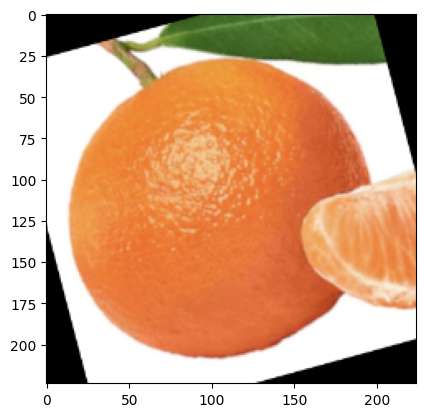

In [26]:
# view a sample validation image
print(le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [27]:
# evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print("Testing Acc: ", acc)
print("Testing Precision: ", prec)
print("Testing Recall: ", rec)

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 454ms/step - Precision: 0.9847 - Recall: 0.9847 - accuracy: 0.9847 - loss: 0.0691
Testing Acc:  0.9898862242698669
Testing Precision:  0.9898862242698669
Testing Recall:  0.9898862242698669


In [28]:
def LoadImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224], method="bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0)
    return image

def RealtimePrediction(image_path, model, encoder_):
    image = LoadImage(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction, axis=1)
    return encoder_.inverse_transform(prediction)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


'rottenoranges'

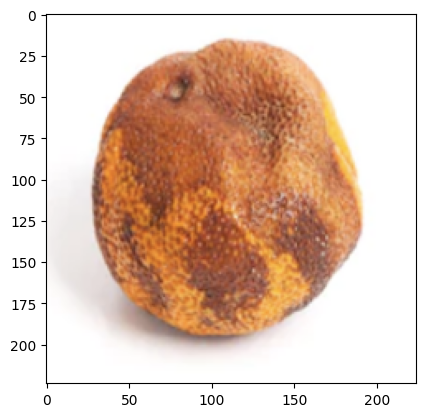

In [29]:
RealtimePrediction("/kaggle/input/fresh-and-rotten-orange/test/rottenoranges/Screen Shot 2018-06-12 at 11.20.05 PM.png", model, le)